# HW2 Matplotlib and Numpy (70 points)

## Electronic submission due 11:59pm, Fri 2/24`

To complete this homework, you need to download the data file named gradebook.txt, which contain the grades of 100 students in a class. The data file contains 100 rows, each of which represents a student, and 20 columns: the first 10 columns are quizzes, the next 7 columns are homeworks, and the last three columns are exams. 

Complete the python script to analyze the data and produce several statistics and three figures (see example figures on the next page).

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [39]:
#%% load data file


grades = pd.read_table('gradebook.txt', delimiter=' ', header=None).values




In [40]:
#%% 1. (5 points) Find out how many values in the array is negative or NaN, report the counts, and replace NaNs or negative values with 0.


print('Number of NaNs: ', np.sum(np.isnan(grades)))
print('Number of Negatives: ', np.sum(grades < 0))
print('Number of Zeros: ', np.count_nonzero(grades == 0))


grades = np.nan_to_num(grades)
grades[grades < 0] = 0


Number of NaNs:  0
Number of Negatives:  95
Number of Zeros:  5


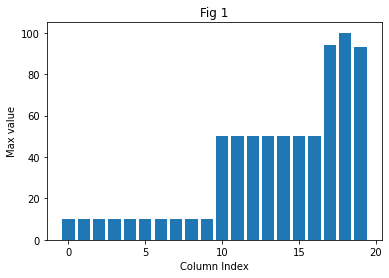

In [41]:
#%% 2. (10 points) Generate a bar chart for the max of each column (20 bars).

plt.figure(1)

#Fill the barchart
maxCol = grades.max(axis=0)
num_rows_g, num_cols_g = grades.shape       #get the number of rows and cols in the grades matrix


x_index = np.arange(num_cols_g, dtype=int)      #x axis index from number of columns

plt.bar(x_index, maxCol)


plt.xticks(np.arange(0, num_cols_g+1 ,5))

plt.xlabel('Column Index')
plt.ylabel('Max value')
plt.title('Fig 1')
plt.show()

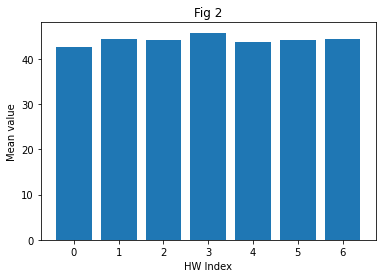

In [42]:
#%% 3.	(10 points) Generate a bar chart for the mean of each HW (7 bars).

plt.figure(2)
plt.xlabel('HW Index')
plt.ylabel('Mean value')
plt.title('Fig 2')


#the first 10 columns are quizzes, the next 7 columns are homeworks, and the last three columns are exams.
# Need to get an array of only homeworks

hws = grades[:, 10:17]        #hws is a array of only hws 
num_rows_HW, num_cols_HW = hws.shape

#Get the Mean of the 7 Homeworks from 20 students

meanHW = hws.mean(axis=0)

x_index = np.arange(num_cols_HW, dtype=int)

plt.bar(x_index, meanHW)

plt.show()



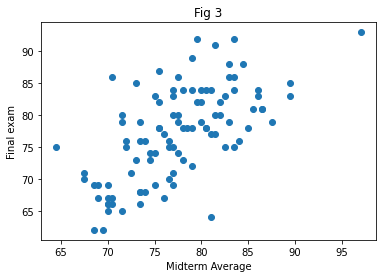

In [43]:
#%% 4.	(10 points) Scatter plot the average of the two midterm exams exam against the final exam.
plt.figure(3)

#Get the average of both midterms
midterms = grades[:, 17:19]

avgMidterm = midterms.mean(axis=1)


#Get the final 
final = grades[:, 19:20]

plt.scatter(avgMidterm, final)


plt.xlabel('Midterm Average')
plt.ylabel('Final exam')
plt.title('Fig 3')
plt.show()


In [44]:
#%% 5.	(10 points). Sort the final exam score (last column) to find the row index with the top 5 highest scores and report. Also report their grades for the three exams.

#Need to find 5 row indexes based on the highest exam score


#sorted_grades = grades[np.argsort(grades[:, 19])[::-1]]
#print(sorted_grades)

final = grades[:, 19:20]

indices = (-final).argsort(axis=0)[:5]



print('Row index for the top-5 final exam scores:', *indices.flatten())


#Report the exam scores for these 5 students

print('\nAll exam scores for the top-5 final exam scores:')

exams = grades[:, 17:20]

num_rows_i, num_cols_i = indices.shape          #Get useful info on the indices array


for i in range(num_rows_i):                     #Iterate thru the flatten indices array and print exam array at that specific index
  print(exams[indices.flatten()[i]])



Row index for the top-5 final exam scores: 3 29 2 14 1

All exam scores for the top-5 final exam scores:
[ 94 100  93]
[83 84 92]
[78 81 92]
[78 85 91]
[82 76 89]


In [45]:
#%% 6.	(15 points) Compute a final weighted average score of each student: divide each column by the max of that column and then multiple by 100; 
# and then compute a weighted average where each quiz counts 2%, each hw counts 5%, exam 1 and 2 each of which counts 10%, 
# and the final exam counts 25%. 
# Round the final score to the nearest integer. Report the following statistics for the final scores: max, min, median, mean, standard deviation.

maxCol = grades.max(axis=0)           #get the max of each column

gAvg = (grades / maxCol) * 100        #Divde each column by the max of that column then multiply by 100

#Compute the weighted average
                                            #10 quizes, 7 Homeworks, 2 Midterms and 1 final
wAvg = np.average(gAvg, axis = 1, weights = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 
                                             0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                                             0.1, 0.1, 0.25])
rWAvg = np.rint(wAvg)                       #Round the weighted Average
#print(rWAvg)

print('Statistics  for final grade:')
print('\tmax: ', rWAvg.max())
print('\tmin: ', rWAvg.min())
print('\tmedian: ', np.median(rWAvg))
print('\tmean: ', np.mean(rWAvg))
print('\tstd: ', np.std(rWAvg))


Statistics  for final grade:
	max:  97.0
	min:  60.0
	median:  85.0
	mean:  83.41
	std:  7.877937547353368


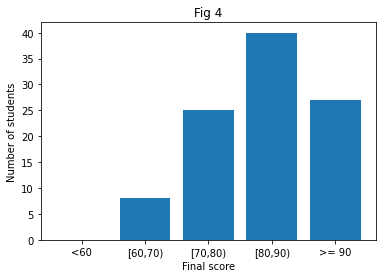

In [47]:
#%% 7.	(10 points) Count the number students whose final score is in the following range: < 60; >=60 and < 70, >=70 and < 80, >=80 and < 90, and >= 90, and plot the counts as a bar chart.

plt.figure(4)

#Need to get final score then count how many fit in each range


lessThanSixty = np.count_nonzero((rWAvg < 60))
sixtyToSeventy = np.count_nonzero((60 <= rWAvg) & (rWAvg < 70))
seventyToEighty = np.count_nonzero((70 <= rWAvg) & (rWAvg < 80))
eightyToNinety = np.count_nonzero((80 <= rWAvg) & (rWAvg < 90))
greaterThanNinety = np.count_nonzero((rWAvg >= 90))

scoreCount = np.array([lessThanSixty, sixtyToSeventy, seventyToEighty, eightyToNinety, greaterThanNinety])

categories = ('<60', '[60,70)', '[70,80)', '[80,90)', '>= 90')

plt.bar(categories, scoreCount)
 
plt.xticks(range(5), categories)
plt.ylabel('Number of students')
plt.xlabel('Final score')
plt.title('Fig 4')
plt.show()
